In [6]:
import os
import tarfile
import urllib

ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
PATH = os.path.join("datasets", "housing")
URL = ROOT + "datasets/housing/housing.tgz"

def get_data(URL = URL, PATH = PATH):
    os.makedirs(PATH, exist_ok=True)
    tgz_path = os.path.join(PATH, 'housing.tgz')
    urllib.request.urlretrieve(URL, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=PATH)
    housing_tgz.close()

In [9]:
import pandas as pd

def load(PATH=PATH):
    csv_path = os.path.join(PATH, 'housing.csv')
    return pd.read_csv(csv_path)

In [ ]:
# 데이터 불러오기

In [7]:
get_data()

In [10]:
housing = load()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# 데이터 특성 파악

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

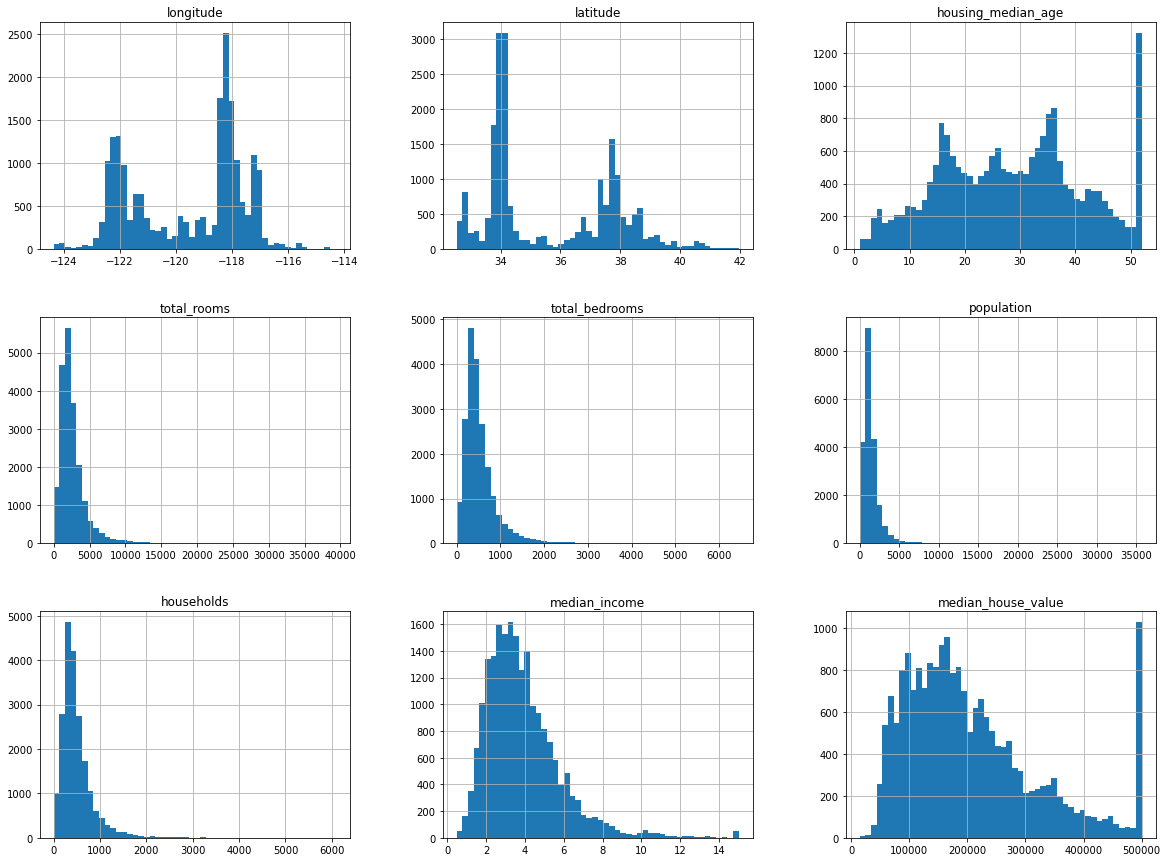

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
# 꼬리가 긴 항목들이 많기에 로그 스케일 등을 고려해볼 수 있음

In [14]:
# train_test set split

In [ ]:
from sklearn.model_selection import train_test_split
trian_set, test_set = train_test_split(housing, test_size=0.2, randomstate=42)

In [16]:
# 계층적 샘플링
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])

<AxesSubplot:>

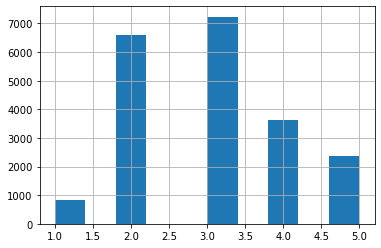

In [18]:
housing['income_cat'].hist()

In [19]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
# n_splits = 분리할 데이터 셋의 개수
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [25]:
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [28]:
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [29]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

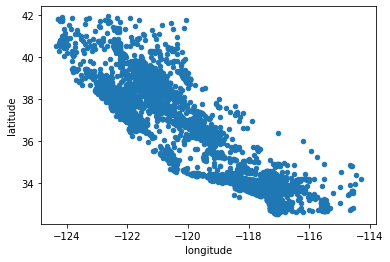

In [32]:
# 지리적 데이터 시각화
housing.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

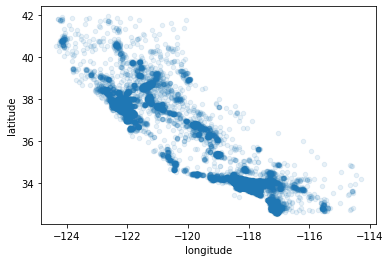

In [33]:
# 밀집된 지역까지 확인하기
housing.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.1)

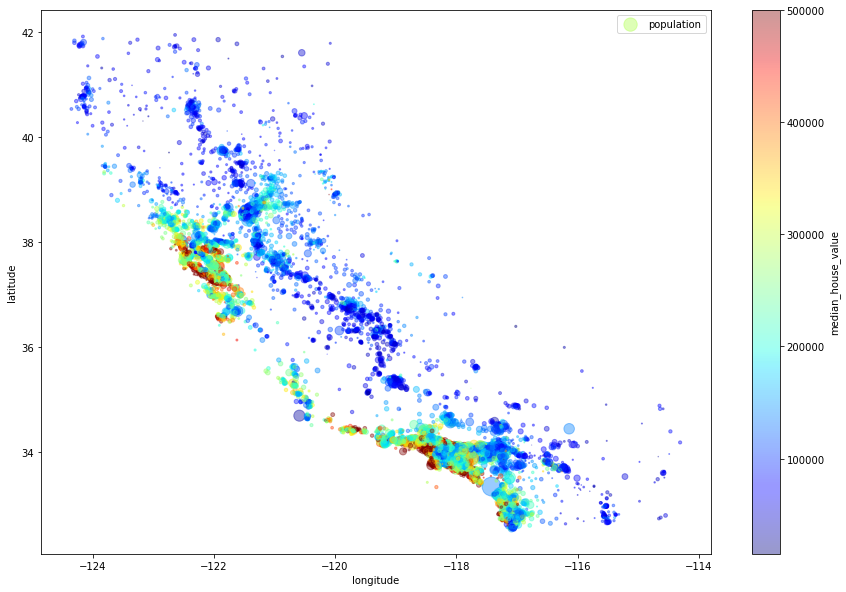

In [34]:
# 캘리포니아 주택가격 : 빨간색은 높은 가격, 파란색은 낮은 가격, 큰 원은 인구가 밀집된 지역
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label ='population', figsize=(15,10),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            sharex=False)
plt.legend()

In [35]:
# 해안가 위주가 가격이 높은 것을 볼 수 있음
# 군집을 추가해 해안근접성 특징을 추가할 수 있겠지만, 북부지방의 경우 가격이 낮을 것을 볼 수 있기 때문에 간단한 규칙을 적용하기는 어려워 보임

In [37]:
# 상관성 분석해보기

corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [39]:
# 중간가격(종속변수)와 다른 특성들 간의 상관관계 파악
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

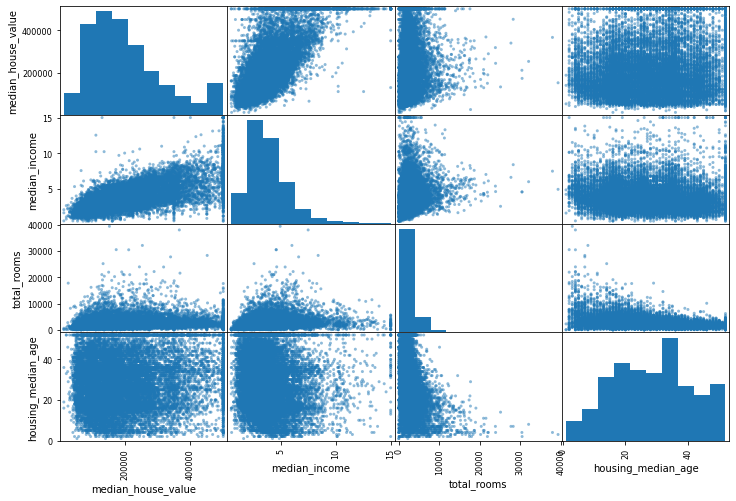

In [40]:
## 상관계수는 선형적인 관계만을 파악함
## 이를 보완하기 위해 산점도 메트릭스를 활용해볼 수 있음

from pandas.plotting import scatter_matrix
attr = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attr], figsize=(12,8))

In [42]:
# 특성들의 조합으로 유용한 특성 만들기

housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [43]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [44]:
# 새로운 항목인 bedrooms_per_room은 전체 방 개수나 침실 개수보다 중간 주택 가격과의 상관계수가 훨씬 큼
# 이런 식으로 다양한 특성의 조합을 통해 유용한 특성을 새롭게 생성해낼 수 있음

In [45]:
# 머신러닝 알고리즘을 위한 데이터 준비

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
# 데이터 정제 : 누락값
# 방법 : 1)구역 제거 2) 전체 특성 삭제 3) 누락값 채움(0, 평균, 중간값 등)

housing.dropna(subset=['total_bedrooms']) # 구역 제거
housing.drop('total_bedrooms', axis=1) # 특성 삭제
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True) # 중간값 채움

In [46]:
# SimpleImputer로 누락값 다루기
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# object 특성 제외
housing_num = housing.drop('ocean_proximity', axis=1)

# 훈련데이터에 적용
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [48]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [50]:
# imputer 객체를 사용해 누락값을 중간값으로 바꾸기
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [51]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [61]:
# object, category 특성 다루기
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [65]:
# 임의 텍스트가 아닌, 범주형 특성임을 알 수 있음
# OrdinalEncoder 클래스를 사용해서 대체하기

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [66]:
# 하지만 문제점 존재, 가까이 있는 값이 떨어져 있는 값보다 비슷하다고 생각한다는 것
# 'bad', 'average', 'excellent'의 경우에는 사용 가능하지만
# 위 경우에는 해당하지 않음
# 원-핫 인코딩을 통해 해결 가능

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [68]:
# 희소행렬을 넘파이 배열로 바꾸기
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [72]:
# 조합 특성을 추가하는 간단한 변환기 Class 생성하기

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extraattribs = attr_adder.transform(housing.values)

In [69]:
# 특성 스케일링
# 정규화 = MinMaxScaler : 정규화 ==> 값의 범위가 0 ~ 1로 고정(바꿀 수는 있음, feature_range 매개변수로)
# 표준화 = StandardSacaler 평균 0, 분산 1로 만드는 것 ==> 특정 이상값의 영향을 덜 받음

# 변환 파이프라인
# 변환단계는 많으며, 정확한 순서대로 실행되어야 함
# 연속된 변환을 순서대로 처리할 수 있도록 도와주는 Pipeline 클래스를 사용함

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler(),)
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [76]:
# 하나의 변환기로 각 열마다 적절한 변환을 적용할 수 있다면 더 편할 것
# ColumnTransformer

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [77]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [81]:
# 모델 선택과 훈련

# 1. 선형회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# 2. 성능파악 RMSE
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [82]:
## 중간 주택가격은 대부분 $120,000 ~ 265,000 이므로 예측오차가 $68,628인 것은 매우 만족스럽지 못함
## 이는 과소적합 됐음을 의미하거나, 데이터가 충분한 정보를 제공하지 못했거나, 모델이 충분히 강력하지 못함을 의미

In [84]:
# 1. DecisionTreeRegression 사용

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

# 2. 모델 평가
housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [86]:
## 오차가 0, 과적합됐다고 볼 수 있음
## 교차 검증을 사용해 평가해볼 필요가 있음
## Fold 사용

In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_score = np.sqrt(-scores)
# sklearn의 교차검증기능은 scoring 매개변수에 낮을수록 좋은 비용함수가 아니라 클수록 좋은 효용함수를 기대함
# 따라서 mse의 반대값(음수값)을 계산하는 neg_mean_sqared_error를 사용
# 이런 이유로 제곱근을 계산하기 전에 -scores로 부호를 바꿈

In [96]:
print('점수 : ', tree_rmse_score)
print('평균 : ', tree_rmse_score.mean())
print('표준편차 : ', tree_rmse_score.std())

점수 :  [69542.61382382 66268.74534325 70563.64532009 69935.70494104
 70565.6960338  76099.64457753 71293.90813505 71393.89350698
 75387.5401724  68556.82787301]
평균 :  70960.82197269775
표준편차 :  2783.3909703804943


In [97]:
# 비교를 위해 선형 회귀 모델의 점수 계산
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
print('점수 : ', lin_rmse_score)
print('평균 : ', lin_rmse_score.mean())
print('표준편차 : ', lin_rmse_score.std())

점수 :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 :  69052.46136345083
표준편차 :  2731.6740017983443


In [98]:
## 트리모형이 과적합되어 선형회귀모델보다 성능이 나쁨을 알 수 있음

In [99]:
# 마지막 RandomForestRegressor 사용

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
print('점수 : ', forest_rmse_score)
print('평균 : ', forest_rmse_score.mean())
print('표준편차 : ', forest_rmse_score.std())

점수 :  [49481.9767138  47920.75717105 49906.10893206 52083.50037195
 49633.32543818 53100.49465381 48723.68254708 47795.88946103
 53206.95925526 50038.045332  ]
평균 :  50189.073987622294
표준편차 :  1873.620570573058


In [100]:
housing_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18796.829697426252

In [ ]:
## 다른 두 모델보다 훨씬 좋지만, 훈련세트에 대한 점수보다 검증세트에 대한 점수가 훨씬 크므로
## 여전히 과적합되어있음을 알 수 있음

## ==> 모델을 간단히 하거나, 규제를 하거나, 더 많은 훈련데이터를 모으는 방법이 있을 수 있음

In [102]:
# 모델 세부 튜닝

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3,10,30], 'max_features' : [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
# 첫번째 dict에 있는 3 * 4 = 12 개를 평가
# 두번째 dict에 있는 2 * 3 = 6 개를 평가 (bootstrap = False)
# 12 + 6 = 18개 조합을 탐색하고, 각각 다섯 번 훈련(K-fold = 5이기 때문)
# 전체 훈련 횟수는 18 * 5 = 90번

grid_search.best_params_
# 최대값이 최적이라고 나왔으므로, 값을 더 크게해서 구할 필요가 있음

{'max_features': 8, 'n_estimators': 30}

In [104]:
# 하지만 이 같은 방식은 너무 많은 비효율을 발생
# RandomizedSearchCV로 사용 가능

In [105]:
# 각 특성의 상대적 중요도를 파악할 수도 있음
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.38816308e-02, 6.81300506e-02, 4.13571890e-02, 1.57585122e-02,
       1.44102935e-02, 1.52614554e-02, 1.33214181e-02, 3.44606410e-01,
       5.46573708e-02, 1.10656289e-01, 6.73875226e-02, 1.18676191e-02,
       1.58699082e-01, 9.59735110e-05, 5.13995517e-03, 4.76922769e-03])

In [107]:
# 중요도와 특성들을 통해 덜 중요한 특성들을 제외할 수 있음
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34460640996527936, 'median_income'),
 (0.1586990823499948, 'INLAND'),
 (0.11065628921878887, 'pop_per_hhold'),
 (0.07388163076072192, 'longitude'),
 (0.06813005061513212, 'latitude'),
 (0.06738752264710585, 'bedrooms_per_room'),
 (0.054657370835340086, 'rooms_per_hhold'),
 (0.04135718898713479, 'housing_median_age'),
 (0.015758512212137664, 'total_rooms'),
 (0.015261455404363224, 'population'),
 (0.014410293530820453, 'total_bedrooms'),
 (0.013321418051183809, 'households'),
 (0.01186761905158323, '<1H OCEAN'),
 (0.005139955166602961, 'NEAR BAY'),
 (0.004769227692791595, 'NEAR OCEAN'),
 (9.597351101936991e-05, 'ISLAND')]

In [110]:
# 최종 모델 형성 및 평가

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47432.31717534175

In [113]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45433.62517247, 49350.12795254])